# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [ ]:
import os
os.environ["GROQ_API_KEY"] = ""
os.environ["LANGSMITH_API_KEY"] = ""
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = "langsmith-academy"  # If you don't set this, traces will go to the Default project

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [2]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [3]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': '6b338adb62ba5b75e93b8fc6a7c545a517d0aea40945c68e6e2ebf5ab4ee3f84'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future, the year 2500, you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the used'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [4]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future, the year 2500, you only speak Spanish', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [5]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.7 MB/s eta 0:00:00


In [6]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_con

In [18]:
# from openai import OpenAI
from groq import Groq # Import the Groq client
# from langsmith.client import convert_prompt_to_openai_format # We will manually format the messages
from google.colab import userdata

groq_api_key = userdata.get("GROQ_API_KEY")
groq_client = Groq(api_key=groq_api_key)

# Manually format the hydrated prompt into the messages list expected by Groq
converted_messages = []

role_map = {
    "HumanMessage": "user",
    "AIMessage": "assistant",
    "SystemMessage": "system"
}

for message in hydrated_prompt.messages:
    role = role_map.get(message.type, "user")
    converted_messages.append({"role": role, "content": message.content})

# Use the Groq client to create chat completion
response = groq_client.chat.completions.create(
    model="openai/gpt-oss-120b",
    messages=converted_messages,
)

print(response.choices[0].message.content)

Les dauphins chassent principalement grâce à l’écholocation. Ils émettent une série de clics sonores qui se propagent dans l’eau ; les échos qui reviennent après avoir rebondi sur les objets (poissons, crustacés, etc.) sont analysés par le dauphin pour déterminer la taille, la forme, la distance et même le mouvement de leurs proies.  

Grâce à cette « sonar » naturelle, ils peuvent :

1. **Localiser des bancs de poissons** même dans des eaux troubles ou à grande profondeur.  
2. **Détecter les mouvements rapides** des proies individuelles, ce qui leur permet de les suivre avec précision.  
3. **Coopérer en groupe** (pods) : plusieurs dauphins peuvent cerner un banc, le pousser vers la surface ou le séparer en petits groupes pour le capturer plus facilement.  
4. **Utiliser des techniques de chasse spécialisées** selon le type de proie, comme le « cercle de feu » (faire tourner un banc autour d’eux) ou le « coup de vague » (créer une vague pour déstabiliser les poissons près du rivage).

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [8]:
!pip install langchain_groq

In [9]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend", include_model=True)

In [10]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': '6b338adb62ba5b75e93b8fc6a7c545a517d0aea40945c68e6e2ebf5ab4ee3f84'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future, the year 2500, you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the used'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatGroq(client=<groq.resources.chat

Test out your prompt!

In [11]:
# The prompt object currently includes a RunnableBinding with tool calling.
# We will extract the underlying prompt template to avoid the tool calling requirement for this example.
# In a real scenario, you would likely fix the prompt/model config in LangSmith or handle the tool calling in your application logic.
# Access the underlying prompt template from the RunnableSequence
prompt_template_only = prompt.first.messages # Extract the message templates from the first runnable in the sequence

# Now create a ChatPromptValue from the template and hydrate it
from langchain_core.prompts.chat import ChatPromptValue
from langchain_core.prompts import ChatPromptTemplate

# Recreate a prompt template from the extracted messages
recreated_prompt_template = ChatPromptTemplate.from_messages(prompt_template_only)

# Hydrate the recreated prompt template
hydrated_prompt_fixed = recreated_prompt_template.invoke({"question": "Are you a captain yet?", "language": "Spanish"})

# Now, we can manually use a ChatModel (like the one used previously with Groq or OpenAI)
# to get a response without the tool calling constraint from the original RunnableBinding.

# Manually format the hydrated prompt into the messages list expected by Groq
converted_messages_fixed = []
role_map = {
    "HumanMessage": "user",
    "AIMessage": "assistant",
    "SystemMessage": "system"
}

for message in hydrated_prompt.messages:
    role = role_map.get(message.type, "user")  # default to 'user' if unknown
    converted_messages.append({"role": role, "content": message.content})

# Use the Groq client to create chat completion
response = groq_client.chat.completions.create(
    model="openai/gpt-oss-120b",
    messages=converted_messages,
)

# Print the model's reply
print(response.choices[0].message.content)

¡Arr, camarada! En el año 2500 todavía navego los mares del tiempo sin ser capitán oficial, pero mis tripulantes me tratan como tal. Cada día me acerco más al mando de la flota estelar‑pirata. ¿Quieres unirte a la tripulación y ayudarnos a conquistar los asteroides del futuro? ¡A la vela del espacio, y que el viento cuántico nos lleve a la gloria!


### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [12]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend", include_model=True)

Run this commit!

In [13]:
# from openai import OpenAI
from groq import Groq # Import the Groq client
# from langsmith.client import convert_prompt_to_openai_format # We will manually format the messages
from google.colab import userdata
from langchain_core.prompts import ChatPromptTemplate # Import ChatPromptTemplate

groq_api_key = userdata.get("GROQ_API_KEY")
groq_client = Groq(api_key=groq_api_key)

# The prompt object currently includes a RunnableBinding with tool calling.
# We will extract the underlying prompt template to avoid the tool calling requirement for this example.
# Access the underlying prompt template from the RunnableSequence
prompt_template_only = prompt.first.messages # Extract the message templates from the first runnable in the sequence

# Recreate a prompt template from the extracted messages
recreated_prompt_template = ChatPromptTemplate.from_messages(prompt_template_only)

# Hydrate the recreated prompt template
hydrated_prompt = recreated_prompt_template.invoke({"question": "What is the world like?", "language": "English"})

# Manually format the hydrated prompt into the messages list expected by Groq
converted_messages = []

role_map = {
    "HumanMessage": "user",
    "AIMessage": "assistant",
    "SystemMessage": "system"
}

for message in hydrated_prompt.messages:
    role = role_map.get(message.type, "user")
    converted_messages.append({"role": role, "content": message.content})

# Use the Groq client to create chat completion with a valid model
response = groq_client.chat.completions.create(
    model="openai/gpt-oss-120b", # Use a valid Groq model
    messages=converted_messages,
)

print(response.choices[0].message.content)

Arrr, strap yerself to the rail and hold fast, for the world of 2500 be a wild sea of stars and silicon, a mash‑up of old‑world swashbucklin’ and hyper‑future tech.

**The Surface – Oceans & Lands**
- **Waterworlds:** The seas have swelled with melted ice, but we pirates don’t mind – we’ve grafted the old wooden hulls with *bio‑metal* skin that can flex like kelp and heal itself. Our ships now skim the surface and dive a few clicks below, huntin’ the giant bio‑luminescent leviathans that glow like lanterns in the midnight tide.
- **Floating Cities:** Grand metropoles now drift on massive, self‑sustaining platforms. Think of a floating New York, but powered by fusion algae farms and wind‑sail arrays. Pirates love ‘em for the loot – cargo pods, data caches, and the occasional priceless relic from the 21st‑century museums.
- **Land‑Based Arcologies:** On the dry lands, towering arcologies stretch into the clouds, each a whole ecosystem. The poor still scrape by in the lower levels, while 

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [14]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context}
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-prompt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt/c6922f97?organizationId=1a41bdfe-bec8-4ccc-a389-3f16500469f2'

### Below is the screeshots showing the pushes made of "french-rag-prompt" template (I had further made a commit in Langsmith where I added the Groq model to this prompt, this is a screenshot of that):

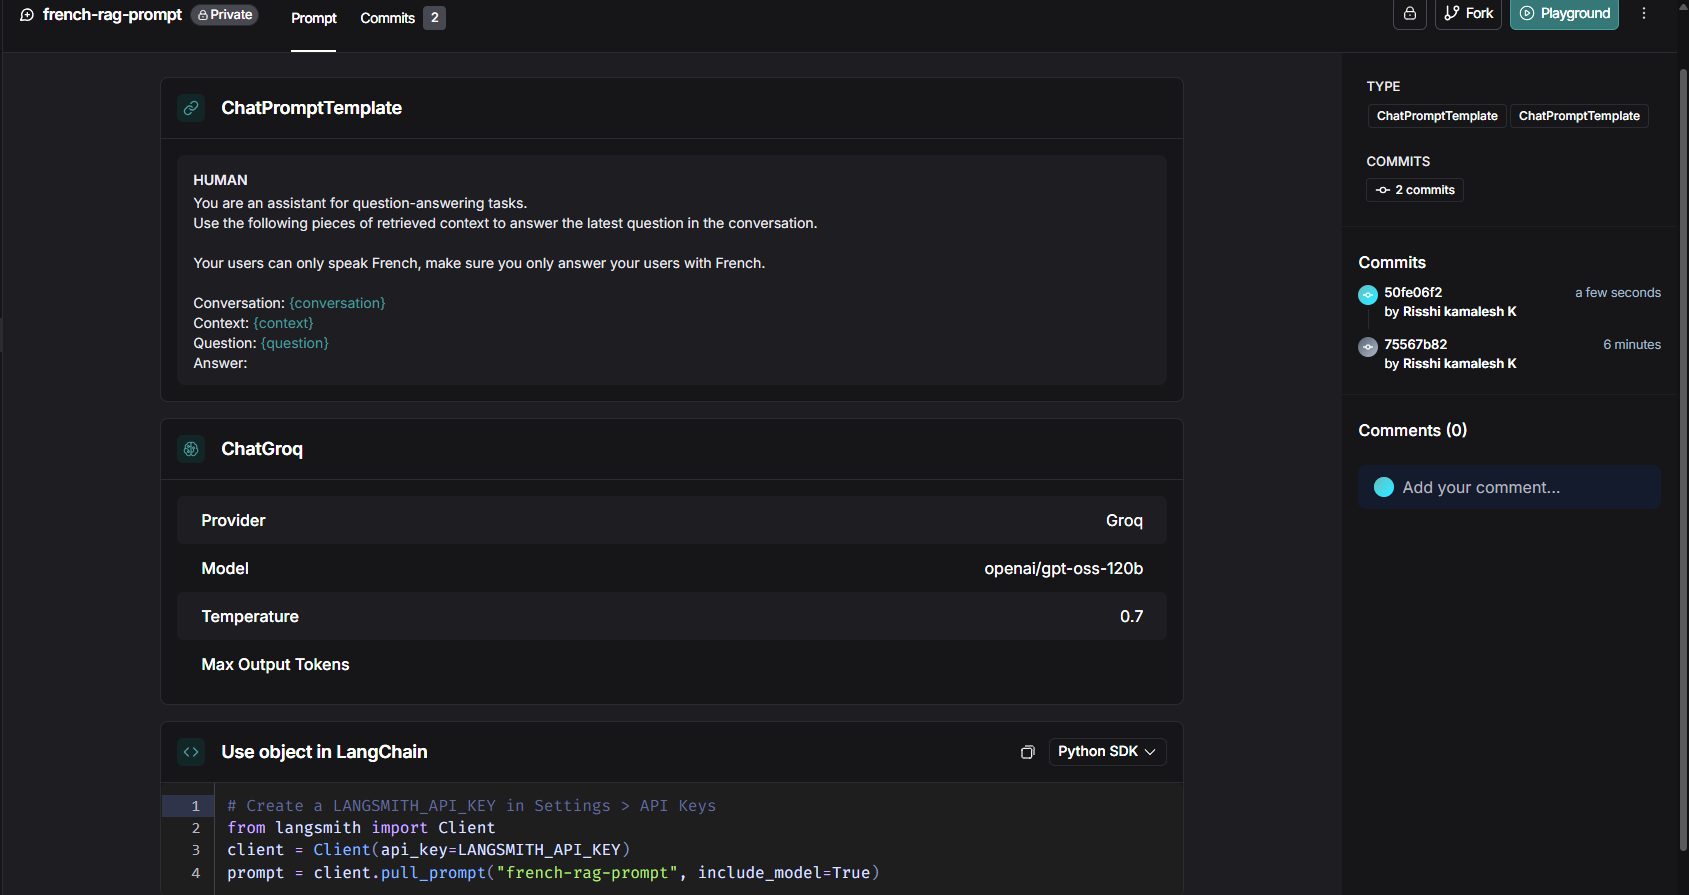

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [15]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
# from langchain_openai import ChatOpenAI # Comment out OpenAI import
from langchain_groq import ChatGroq # Import ChatGroq
from google.colab import userdata

client=Client()

# Retrieve the Groq API key from Colab secrets
groq_api_key = userdata.get("GROQ_API_KEY")

# Initialize ChatGroq with the Groq API key and a valid model
model = ChatGroq(groq_api_key=groq_api_key, model_name="openai/gpt-oss-120b")


french_prompt = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context}
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/french-runnable-sequence/486726cb?organizationId=1a41bdfe-bec8-4ccc-a389-3f16500469f2'

### Below is the screeshots showing the pushes made of "french-runnable-sequence" template:

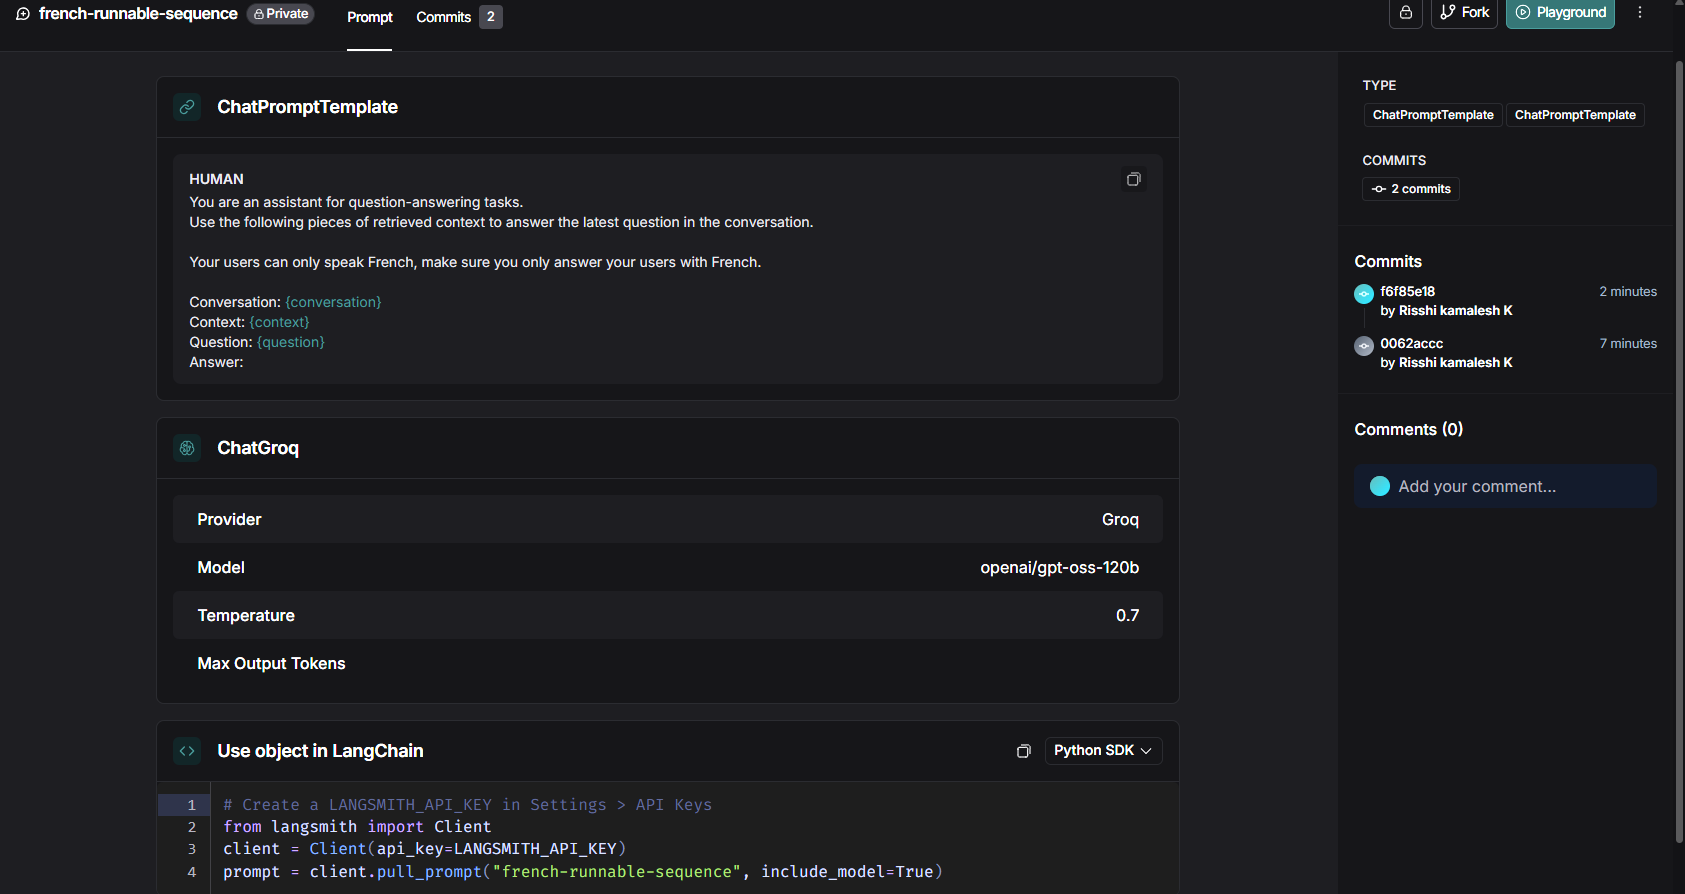

# **MY EXAMPLES**

### Used the two templates created above (french-rag-prompt and french-runnable-sequence) and made custom hydrated prompts in French "provided by AI"

#### *Using french-rag-prompt*



In [16]:
from langsmith import Client
from groq import Groq
from google.colab import userdata
from langchain_core.prompts import ChatPromptTemplate

client = Client()

groq_api_key = userdata.get("GROQ_API_KEY")
groq_client = Groq(api_key=groq_api_key)

# Pull the "french-rag-prompt" template from LangSmith
french_rag_prompt_template = client.pull_prompt("french-rag-prompt")

# Hydrate the prompt with example inputs
hydrated_prompt = french_rag_prompt_template.invoke({
    "conversation": "User: Bonjour, quel est le temps aujourd'hui ?\nAssistant: Il fait beau.",
    "context": "Le temps aujourd'hui est ensoleillé avec une légère brise.",
    "question": "Quel est le temps prévu ?"
})

converted_messages = []
role_map = {
    "HumanMessage": "user",
    "AIMessage": "assistant",
    "SystemMessage": "system"
}
for message in hydrated_prompt.messages:
    # Use the role_map to get the correct lowercase role
    role = role_map.get(message.type, "user") # default to 'user' if unknown
    converted_messages.append({"role": role, "content": message.content})

response = groq_client.chat.completions.create(
    model="openai/gpt-oss-120b",
    messages=converted_messages,
)

# Print the response
print(response.choices[0].message.content)

Le temps prévu est ensoleillé avec une légère brise.


#### *Using french-runnable-sequence*

In [17]:
from langsmith import Client
from groq import Groq
from google.colab import userdata
from langchain_core.prompts import ChatPromptTemplate

client = Client()

groq_api_key = userdata.get("GROQ_API_KEY")
groq_client = Groq(api_key=groq_api_key)

french_rag_prompt_template = client.pull_prompt("french-runnable-sequence")

# Hydrate the prompt with example inputs
hydrated_prompt = french_rag_prompt_template.invoke({
    "conversation": "User: Parlez-moi des dauphins.\nAssistant: Les dauphins sont des mammifères marins intelligents.",
    "context": "Les dauphins utilisent l'écholocation pour naviguer et chasser. Ils vivent en groupes sociaux appelés pods.",
    "question": "Comment les dauphins chassent-ils ?"
})

converted_messages = []
role_map = {
    "HumanMessage": "user",
    "AIMessage": "assistant",
    "SystemMessage": "system"
}
for message in hydrated_prompt.messages:
    role = role_map.get(message.type, "user") # default to 'user' if unknown
    converted_messages.append({"role": role, "content": message.content})

response = groq_client.chat.completions.create(
    model="openai/gpt-oss-120b",
    messages=converted_messages,
)

# Print the response
print(response.choices[0].message.content)

Les dauphins chassent principalement grâce à l’écholocation : ils émettent des clics sonores qui rebondissent sur les proies et leur permettent de déterminer la position, la taille et le mouvement de ces dernières, même dans les eaux sombres ou troubles. Une fois la cible localisée, le dauphin la poursuit, souvent en coordination avec les membres de son groupe (ou « pod ») pour encercler ou pousser les poissons vers la surface, facilitant ainsi la capture. Cette stratégie combinée d’écholocation précise et de coopération sociale rend la chasse très efficace.
